In [1]:
%matplotlib inline

In [207]:
import json
import numpy as np
import pandas as pd
from scipy import stats
from collections import Counter




# from Bio import Phylo
# import copy
# from matplotlib import pyplot as plt
# import statsmodels.formula.api as smf

# Example deltaI data

**This data is not generally saved in its entirety for each species so this `.json` file is an example that was run independently**

In [6]:
with open('../Data/caulo_sd.json') as infile:
    caulo_dict = json.load(infile)
len(caulo_dict['random'])

500

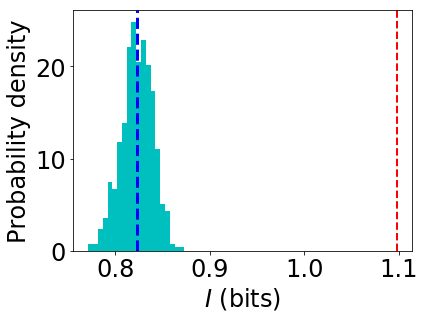

In [13]:
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.hist(caulo_dict['random'], 20, normed=True, facecolor='C', linewidth=0.5)
ax.axvline(caulo_dict['actual'], color='r', linestyle='--', linewidth=2)
ax.axvline(np.mean(caulo_dict['random']), color='b', linestyle='--', linewidth=3)
ax.tick_params(labelsize=24)
ax.set_xlabel('$I$ (bits)', fontsize=24)
ax.set_ylabel('Probability density', fontsize=24)
plt.tight_layout()
plt.savefig('../Results/Figures/caulobacter_example1.pdf')

# Comparing SD metrics

In [16]:
df = pd.read_table('../Data/Pruned_df_Domain_Bacteria_10_2017.csv', sep='\t', index_col='#Id')

print(len(df.index))
print(df.columns)

613
Index(['Organism', 'TaxonID', 'Full_Taxonomy', 'Banfield_tree_name', 'CDS_GC',
       'CDS_GC_nostartstop', 'Ribo_prot_GC_nostartstop', 'CDS_number',
       'Intragenic_GC', 'Gene_density', 'Coding_density', 'Genome_length',
       'Intragenic_length', 'CDS_length', 'tRNA_number', 'All_NC_wright',
       'All_NC_novembre', 'All_NC_info', 'Ribo_NC_wright', 'Ribo_NC_novembre',
       'Ribo_NC_info', 'Ribo_prot_number', 'Information_content_all(-20_-4)',
       'Information_content_ribo(-20_-4)',
       'Information_content_all_mean_random(-20_-4)',
       'Information_content_ribo_mean_random(-20_-4)', 'Mean_binding_all',
       'Mean_binding_ribo', 'Mean_binding_all_mean_random',
       'Mean_binding_ribo_mean_random', 'Location_of_best_binding_all',
       'Location_of_best_binding_ribo', 'ATG_start_percent', '16s_copies',
       '23s_copies', 'CDS_with_SD_utr_motif', 'Expected_CDS_with_SD_utr_motif',
       'CDS_with_SD_utr_binding', 'Expected_CDS_with_SD_utr_binding',
       'RP_

SpearmanrResult(correlation=0.76428567930724534, pvalue=1.6432294425359245e-118)
SpearmanrResult(correlation=0.79599772488130283, pvalue=2.4622576479266435e-135)
SpearmanrResult(correlation=0.97276661247683194, pvalue=0.0)


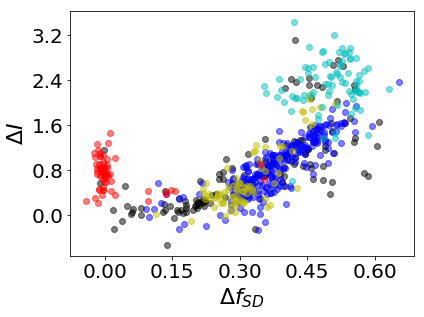

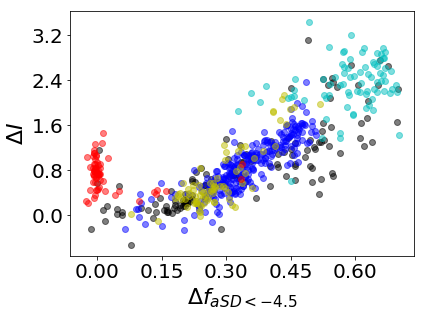

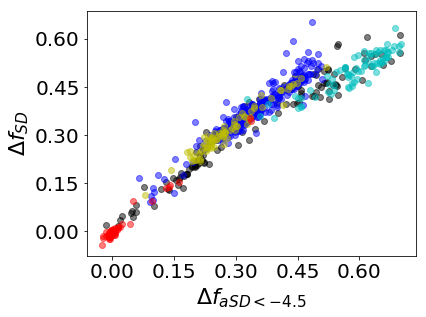

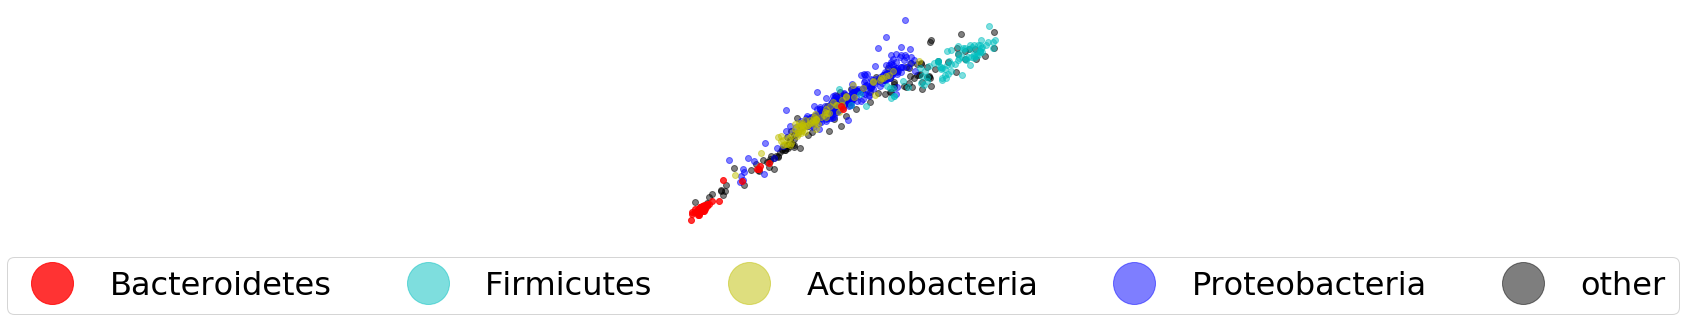

In [20]:
metric1, metric2 = ('SD_summary_all_motif_diff', 'SD_summary_all_info')
df_bacteroidetes = df[df['Phylum'] == 'Bacteroidetes']
df_actino = df[df['Phylum'] == 'Actinobacteria']
df_firmicutes = df[df['Phylum'] == 'Firmicutes']
df_proteo = df[df['Phylum'] == 'Proteobacteria']
df_other = df[df['Phylum'].isin(['Actinobacteria', 'Firmicutes', 'Bacteroidetes', 'Proteobacteria'])==False]


fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.plot(df_other[metric1], df_other[metric2], 'ko', alpha=0.5)
ax.plot(df_proteo[metric1], df_proteo[metric2], 'bo', alpha=0.5)
ax.plot(df_actino[metric1], df_actino[metric2], 'yo', alpha=0.5)
ax.plot(df_firmicutes[metric1], df_firmicutes[metric2], 'co', alpha=0.5)
ax.plot(df_bacteroidetes[metric1], df_bacteroidetes[metric2], 'ro', alpha=0.5)
ax.tick_params(labelsize=20)
max_yticks = 6
yloc = plt.MaxNLocator(max_yticks)
ax.yaxis.set_major_locator(yloc)
max_xticks = 6
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.set_ylabel(r'$\Delta I$', fontsize=22)
ax.set_xlabel(r'$\Delta f_{SD}$', fontsize=22)
plt.tight_layout()
plt.savefig('../Results/Figures/info_v_motif.pdf')
print(stats.spearmanr(df[metric1], df[metric2]))


################################################
################################################
################################################
metric1, metric2 = ('SD_summary_all_binding_diff', 'SD_summary_all_info')
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.plot(df_other[metric1], df_other[metric2], 'ko', alpha=0.5)
ax.plot(df_proteo[metric1], df_proteo[metric2], 'bo', alpha=0.5)
ax.plot(df_actino[metric1], df_actino[metric2], 'yo', alpha=0.5)
ax.plot(df_firmicutes[metric1], df_firmicutes[metric2], 'co', alpha=0.5)
ax.plot(df_bacteroidetes[metric1], df_bacteroidetes[metric2], 'ro', alpha=0.5)
ax.tick_params(labelsize=20)
max_yticks = 6
yloc = plt.MaxNLocator(max_yticks)
ax.yaxis.set_major_locator(yloc)
max_xticks = 6
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.set_xlabel(r'$\Delta f_{aSD<-4.5}$', fontsize=22)
ax.set_ylabel(r'$\Delta I$', fontsize=22)
plt.tight_layout()
plt.savefig('../Results/Figures/info_v_binding.pdf')
print(stats.spearmanr(df[metric1], df[metric2]))


################################################
################################################
################################################
metric1, metric2 = ('SD_summary_all_binding_diff', 'SD_summary_all_motif_diff')
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.plot(df_other[metric1], df_other[metric2], 'ko', alpha=0.5, label='other')
ax.plot(df_proteo[metric1], df_proteo[metric2], 'bo', alpha=0.5, label='Proteobacteria')
ax.plot(df_actino[metric1], df_actino[metric2], 'yo', alpha=0.5, label='Actinobacteria')
ax.plot(df_firmicutes[metric1], df_firmicutes[metric2], 'co', alpha=0.5, label='Firmicutes')
ax.plot(df_bacteroidetes[metric1], df_bacteroidetes[metric2], 'ro', alpha=0.5, label='Bacteroidetes')
ax.tick_params(labelsize=20)
max_yticks = 6
yloc = plt.MaxNLocator(max_yticks)
ax.yaxis.set_major_locator(yloc)
max_xticks = 6
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.set_xlabel(r'$\Delta f_{aSD<-4.5}$', fontsize=22)
ax.set_ylabel(r'$\Delta f_{SD}$', fontsize=22)
plt.tight_layout()
plt.savefig('../Results/Figures/Binding_v_motif.pdf')
print(stats.spearmanr(df[metric1], df[metric2]))


################################################
################################################
################################################
#####This is just for the legend because I couldn't get it to look how i wanted
metric1, metric2 = ('SD_summary_all_binding_diff', 'SD_summary_all_motif_diff')
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
# ax.plot(df[metric1], df[metric2], 'ko', alpha=0.5)
ax.set_axis_off()
ax.plot(df_other[metric1], df_other[metric2], 'ko', alpha=0.5, label='other')
ax.plot(df_proteo[metric1], df_proteo[metric2], 'bo', alpha=0.5, label='Proteobacteria')
ax.plot(df_actino[metric1], df_actino[metric2], 'yo', alpha=0.5, label='Actinobacteria')
ax.plot(df_firmicutes[metric1], df_firmicutes[metric2], 'co', alpha=0.5, label='Firmicutes')
ax.plot(df_bacteroidetes[metric1], df_bacteroidetes[metric2], 'ro', alpha=0.8, label='Bacteroidetes')
ax.tick_params(labelsize=20)
plt.xticks(rotation=45)
ax.set_xlabel('$aSD\ complementarity$', fontsize=24)
ax.set_ylabel('$SD\ motif\ score$', fontsize=24)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=False, ncol=5, fontsize=32, numpoints=1, markerscale=7)
plt.savefig('../Results/Figures/shared_legend.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Ribosome deltaI vs genome-wide deltaI

SpearmanrResult(correlation=0.79873868236286016, pvalue=6.272748537114464e-137)
SpearmanrResult(correlation=0.84919284652503135, pvalue=1.413933201506743e-171)


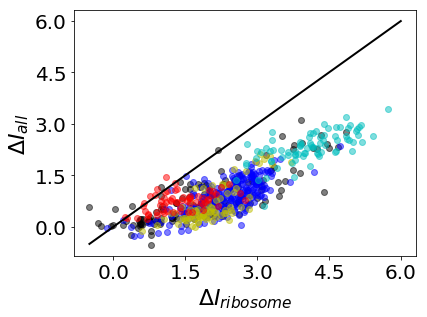

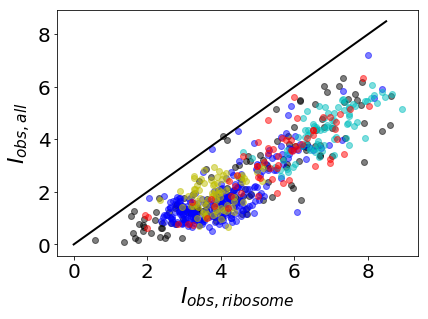

In [31]:
metric1, metric2 = ('SD_summary_ribo_info', 'SD_summary_all_info')
df_bacteroidetes = df[df['Phylum'] == 'Bacteroidetes']
df_actino = df[df['Phylum'] == 'Actinobacteria']
df_firmicutes = df[df['Phylum'] == 'Firmicutes']
df_proteo = df[df['Phylum'] == 'Proteobacteria']
df_other = df[df['Phylum'].isin(['Actinobacteria', 'Firmicutes', 'Bacteroidetes', 'Proteobacteria'])==False]


fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.plot(df_other[metric1], df_other[metric2], 'ko', alpha=0.5)
ax.plot(df_proteo[metric1], df_proteo[metric2], 'bo', alpha=0.5)
ax.plot(df_actino[metric1], df_actino[metric2], 'yo', alpha=0.5)
ax.plot(df_firmicutes[metric1], df_firmicutes[metric2], 'co', alpha=0.5)
ax.plot(df_bacteroidetes[metric1], df_bacteroidetes[metric2], 'ro', alpha=0.5)
ax.plot([-0.5,6], [-0.5,6], c='k', linewidth=2)
ax.tick_params(labelsize=20)
max_yticks = 6
yloc = plt.MaxNLocator(max_yticks)
ax.yaxis.set_major_locator(yloc)
max_xticks = 6
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.set_ylabel(r'$\Delta I_{all}$', fontsize=22)
ax.set_xlabel(r'$\Delta I_{ribosome}$', fontsize=22)
plt.tight_layout()
plt.savefig('../Results/Figures/deltaI_ribosome_v_all.pdf')
print(stats.spearmanr(df[metric1], df[metric2]))

metric1, metric2 = ('Information_content_ribo(-20_-4)', 'Information_content_all(-20_-4)')
df_bacteroidetes = df[df['Phylum'] == 'Bacteroidetes']
df_actino = df[df['Phylum'] == 'Actinobacteria']
df_firmicutes = df[df['Phylum'] == 'Firmicutes']
df_proteo = df[df['Phylum'] == 'Proteobacteria']
df_other = df[df['Phylum'].isin(['Actinobacteria', 'Firmicutes', 'Bacteroidetes', 'Proteobacteria'])==False]


fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.plot(df_other[metric1], df_other[metric2], 'ko', alpha=0.5)
ax.plot(df_proteo[metric1], df_proteo[metric2], 'bo', alpha=0.5)
ax.plot(df_actino[metric1], df_actino[metric2], 'yo', alpha=0.5)
ax.plot(df_firmicutes[metric1], df_firmicutes[metric2], 'co', alpha=0.5)
ax.plot(df_bacteroidetes[metric1], df_bacteroidetes[metric2], 'ro', alpha=0.5)
ax.plot([0,8.5], [0, 8.5], c='k', linewidth=2)
ax.tick_params(labelsize=20)
max_yticks = 6
yloc = plt.MaxNLocator(max_yticks)
ax.yaxis.set_major_locator(yloc)
max_xticks = 6
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.set_ylabel(r'$I_{obs,all}$', fontsize=22)
ax.set_xlabel(r'$I_{obs,ribosome}$', fontsize=22)
plt.tight_layout()
plt.savefig('../Results/Figures/info_ribosome_v_all.pdf')
print(stats.spearmanr(df[metric1], df[metric2]))

# Visualizing regression output from R

**Full growth model**

In [55]:
df = pd.read_table('../Data/growth_rate_dataset_10_2017_EXTENDED.csv', sep='\t', index_col='#Id')
temp_df = pd.read_csv('../Results/growth_fitted_model_full.csv', index_col=0)
temp_df = temp_df.merge(df, left_index=True, right_index=True)

In [56]:
temp_df['Phylum'] = ''
for index in temp_df.index:
    temp_df.set_value(index, 'Phylum', temp_df.loc[index]['Full Taxonomy'].split(';')[1].strip())
df_bacteroidetes = temp_df[temp_df['Phylum'] == 'Bacteroidetes']
df_actino = temp_df[temp_df['Phylum'] == 'Actinobacteria']
df_firmicutes = temp_df[temp_df['Phylum'] == 'Firmicutes']
df_proteo = temp_df[temp_df['Phylum'] == 'Proteobacteria']
df_other = temp_df[temp_df['Phylum'].isin(['Actinobacteria', 'Firmicutes', 'Bacteroidetes', 'Proteobacteria'])==False]

LinregressResult(slope=1.0097861183315071, intercept=-0.38045837251943881, rvalue=0.75666653023845454, pvalue=5.553661471087098e-36, stderr=0.064148217870173718)


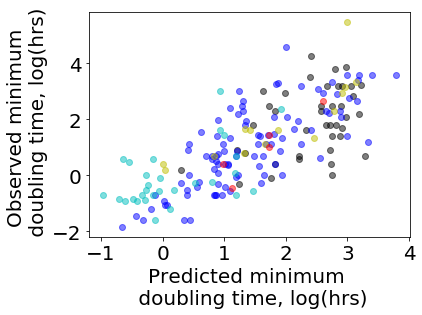

In [57]:
metric2 = ' Doubling Time'
metric1 = 'V1'
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.plot(df_other[metric1], np.log(df_other[metric2]), 'ko', alpha=0.5)
ax.plot(df_proteo[metric1], np.log(df_proteo[metric2]), 'bo', alpha=0.5)
ax.plot(df_actino[metric1], np.log(df_actino[metric2]), 'yo', alpha=0.5)
ax.plot(df_firmicutes[metric1], np.log(df_firmicutes[metric2]), 'co', alpha=0.5)
ax.plot(df_bacteroidetes[metric1], np.log(df_bacteroidetes[metric2]), 'ro', alpha=0.5)
ax.tick_params(labelsize=20)
max_xticks = 6
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.set_ylabel('Observed minimum \n doubling time, log(hrs)', fontsize=20)
ax.set_xlabel('Predicted minimum \n doubling time, log(hrs)', fontsize=20)
plt.tight_layout()
plt.savefig('../Results/Figures/growth_corr_best.pdf')
print(stats.linregress(temp_df['V1'], np.log(temp_df[' Doubling Time'])))

**Just deltaI**

In [76]:
df = pd.read_table('../Data/growth_rate_dataset_10_2017_EXTENDED.csv', sep='\t', index_col='#Id')
temp_df = pd.read_csv('../Results/growth_fitted_model_SDinfo.csv', index_col=0)
temp_df = temp_df.merge(df, left_index=True, right_index=True)

In [77]:
temp_df['Phylum'] = ''
for index in temp_df.index:
    temp_df.set_value(index, 'Phylum', temp_df.loc[index]['Full Taxonomy'].split(';')[1].strip())
df_bacteroidetes = temp_df[temp_df['Phylum'] == 'Bacteroidetes']
df_actino = temp_df[temp_df['Phylum'] == 'Actinobacteria']
df_firmicutes = temp_df[temp_df['Phylum'] == 'Firmicutes']
df_proteo = temp_df[temp_df['Phylum'] == 'Proteobacteria']
df_other = temp_df[temp_df['Phylum'].isin(['Actinobacteria', 'Firmicutes', 'Bacteroidetes', 'Proteobacteria'])==False]

LinregressResult(slope=-1.0791823551377402, intercept=2.1512747360269149, rvalue=-0.54598444524644718, pvalue=6.3943359658108232e-16, stderr=0.12174934339778042)


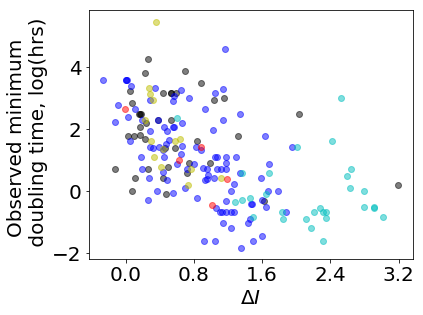

In [78]:
metric2 = ' Doubling Time'
metric1 = 'SD_summary_all_info'
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)
ax.plot(df_other[metric1], np.log(df_other[metric2]), 'ko', alpha=0.5)
ax.plot(df_proteo[metric1], np.log(df_proteo[metric2]), 'bo', alpha=0.5)
ax.plot(df_actino[metric1], np.log(df_actino[metric2]), 'yo', alpha=0.5)
ax.plot(df_firmicutes[metric1], np.log(df_firmicutes[metric2]), 'co', alpha=0.5)
ax.plot(df_bacteroidetes[metric1], np.log(df_bacteroidetes[metric2]), 'ro', alpha=0.5)
ax.tick_params(labelsize=20)
max_xticks = 6
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.set_ylabel('Observed minimum \n doubling time, log(hrs)', fontsize=20)
ax.set_xlabel(r'$\Delta I$', fontsize=20)
plt.tight_layout()
plt.savefig('../Results/Figures/growth_corr_deltaI.pdf')
print(stats.linregress(temp_df['SD_summary_all_info'], np.log(temp_df[' Doubling Time'])))

# Correlation matrix

**Read in the data**

In [199]:
# df = pd.read_csv('../Results/correlation_matrix_Bacteria.csv', sep=' ')
# output_file_name = '../Results/Figures/correlation_matrix_Bacteria.pdf'
#
# df = pd.read_csv('../Results/correlation_matrix_Actinobacteria.csv', sep=' ')
# output_file_name = '../Results/Figures/correlation_matrix_Actinobacteria.pdf'
#
# df = pd.read_csv('../Results/correlation_matrix_Firmicutes.csv', sep=' ')
# output_file_name = '../Results/Figures/correlation_matrix_Firmicutes.pdf'
#
# df = pd.read_csv('../Results/correlation_matrix_Bacteroidetes.csv', sep=' ')
# output_file_name = '../Results/Figures/correlation_matrix_Bacteroidetes.pdf'
#
df = pd.read_csv('../Results/correlation_matrix_Proteobacteria.csv', sep=' ')
output_file_name = '../Results/Figures/correlation_matrix_Proteobacteria.pdf'

print(list(df.columns))

['SD_summary_all_motif_diff', 'SD_summary_all_binding_diff', 'SD_summary_all_info', 'ATG_start_percent', 'Mean_folding_diff', 'X16s_copies', 'tRNA_number', 'NC_summary_info', 'aSD_binding_summary']


In [200]:
# df

**Re-label the columns/rows**

In [201]:
labels = ['$\Delta f_{SD}$', '$\Delta f_{aSD<-4.5}$', '$\Delta I$',\
          'ATG start %', 'mRNA folding', '# of 16S genes', '# of tRNA genes',\
          '$\Delta ENC$', 'Internal SD-like']

In [202]:
###I don't calculate these values because PGLS has a difficult time with them. But that said, I'm just going
###to manually go back in and make them one for the sake of the plot
matrix = df.as_matrix(columns=None)
for i in range(0,9):
    matrix[i,i] = 1

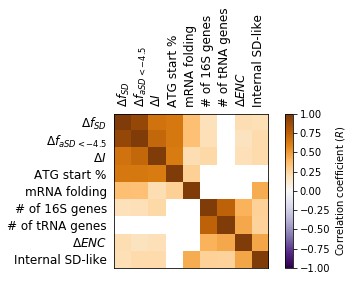

In [203]:
fig, ax = plt.subplots()
cax = ax.matshow(matrix, cmap='PuOr_r', vmin=-1*np.nanmax(matrix), vmax=np.nanmax(matrix))
cbar = fig.colorbar(cax)
ax.xaxis.set_ticks_position('top')
# ax.set_xticks([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
ax.set_xticks(np.arange(-0.4, 8.4, 1))
ax.set_xticklabels(labels, rotation=90, ha='left')
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_yticklabels(labels)
cbar.set_label("Correlation coefficient ($R$)")
ax.tick_params(bottom='off', left='off', top='off')
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig(output_file_name)

# Temperature data

In [223]:
df = pd.read_csv('../Data/Pruned_df_Domain_Bacteria_10_2017_WITH_PROTRAITS_TEMPERATURES.csv', sep='\t', index_col='#Id')
cat_name = 'temperature'
cats = ['mesophiles', 'thermophiles']

In [224]:
print(Counter(list(df[cat_name])))

Counter({'mesophiles': 413, 'thermophiles': 68})


In [225]:
cats_dict = {}
for cat in cats:
    cats_dict[cat] = []
for index in df.index:
        cats_dict[df.loc[index][cat_name]].append(df.loc[index]['SD_summary_all_info'])
#         cats_dict[df.loc[index][cat_name]].append(df.loc[index]['Mean_folding_diff'])

mesophiles
thermophiles
Naive (non phylogenetic) statistical tests:
F_onewayResult(statistic=85.13352962901314, pvalue=8.9460936589615023e-19)
Ttest_indResult(statistic=-9.226783276365234, pvalue=8.9460936589614522e-19)


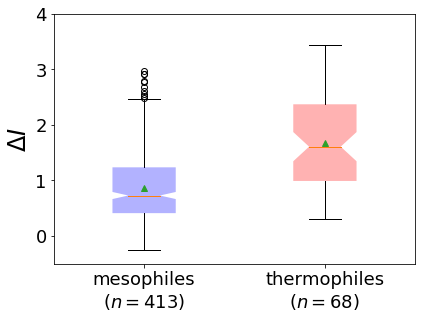

In [227]:
boxplot_data = []
for cat in cats:
    print(cat)
    boxplot_data.append(cats_dict[cat])
    
print('Naive (non phylogenetic) statistical tests:')    
print(stats.f_oneway(*boxplot_data))
print(stats.ttest_ind(boxplot_data[0], boxplot_data[1]))

cats_for_plot = []
for i, cat in enumerate(cats):
    cats_for_plot.append(cat + '\n($n={}$)'.format(len(cats_dict[cat])))

fig = plt.figure(figsize=(6,4.5))
ax = fig.add_subplot(111)
bp = ax.boxplot(boxplot_data, notch=True, widths=0.35, showmeans=True, patch_artist=True)
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['boxes'], linewidth=0)
bp['boxes'][0].set(facecolor='b', alpha=0.3)
bp['boxes'][1].set(facecolor='r', alpha=0.3)
ax.set_xticklabels(cats_for_plot, rotation=0)
# ax.yaxis.set_ticks(np.arange(-0.5,4.0,1))
ax.tick_params(labelsize=18)
ax.set_ylabel(r'$\Delta I$', fontsize=24)
ax.set_ylim(-0.5, 4.0)
plt.tight_layout()
plt.savefig('../Results/Figures/temperature_deltaI.pdf')